# Perceptron Implementation

In this notebook, we will be implementing the perceptron algorithm and testing it on the wine dataset. 

As seen in the below picture, the perceptron will take in multiple features as inputs and eventually decide the sign of the prediction. In other words, it will make a +1 or -1 output. 

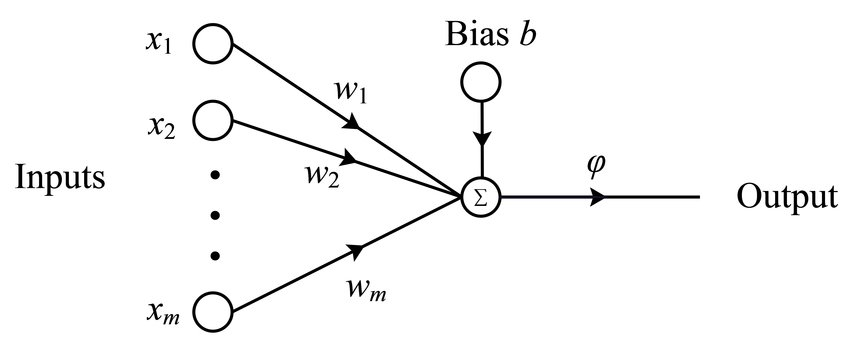


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


wine_data = pd.read_csv("/Users/kritinshanmugam/Desktop/wine.data")

with open("/Users/kritinshanmugam/Desktop/wine.names") as f:
    print(f.read())

'''  
# read the data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
sns.set_theme()

# Wine origins
y.unique()

# drop any N/A instances incase they exist
X = X.dropna()
y = y.dropna()
'''

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

'  \n# read the data (as pandas dataframes) \nX = wine.data.features \ny = wine.data.targets \n  \nsns.set_theme()\n\n# Wine origins\ny.unique()\n\n# drop any N/A instances incase they exist\nX = X.dropna()\ny = y.dropna()\n'

In [22]:
class Perceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
    
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
                if errors == 0:
                    return self
                else:
                    return self.errors_.append(errors)
        
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)

In [28]:
from sklearn.model_selection import train_test_split

# Create instance of Perceptron class with 10k epochs
Percept = Perceptron(epochs = 10_000)

# Split dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

# Train the Perceptron on the training dataset
Percept.train(X_train, y_train)

# Obtain the predictions
y_predictions = Percept.predict(X_test)

booleans = ((y_test == y_predictions))

print(np.sum(booleans == False))
print(y_predictions)

15
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
